# Analyse de Sentiments Twitter

Ce programe implémente une analyse de sentiments sur des tweets en utilisant pandas et des listes de mots positifs/négatifs.

+ Mohamed Islem Ben Farhat

+ Oussama Benali

In [56]:
# 1. Import des bibliothèques nécessaires
import pandas as pd
import string

In [57]:
def read_words(filename):
    """Lit un fichier de mots et retourne une liste"""
    with open(filename, 'r', encoding='utf-8') as file:
        return [line.strip() for line in file if not line.startswith(';') and line.strip()]
# Charger les mots positifs et négatifs
positive_words = read_words('positive_words.txt')
negative_words = read_words('negative_words.txt')
# Charger les tweets
tweets_df = pd.read_csv('project_twitter_data.csv')

In [58]:
# 3. Prétraitement des tweets
def strip_punctuation(word):
    """Supprime la ponctuation d'un mot"""
    return ''.join(char for char in word if char not in string.punctuation)


In [59]:
def CountWords(words,liste):
    return sum(1 for word in words if word in liste)

In [60]:
# 4 . Fonction pour compter les mots positifs 
def get_pos(text):
    """Compte le nombre de mots positifs dans le texte"""
    if not isinstance(text, str):
        return 0
    words = text.lower().split()
    words = [strip_punctuation(word) for word in words]
    return CountWords(words, positive_words)

In [61]:
# 4 . Fonction pour compter les mots negatifs
def get_neg(text):
    """Compte le nombre de mots négatifs dans le texte"""
    if not isinstance(text, str):
        return 0
    words = text.lower().split()
    words = [strip_punctuation(word) for word in words]
    return CountWords(words,negative_words)

In [62]:
# 2. Analyse des sentiments
def analyze_sentiment(tweet):
    """Analyse le sentiment d'un tweet"""
    if not isinstance(tweet, str):
        return pd.Series({'positive_score': 0, 'negative_score': 0, 'net_score': 0})
        
    positive_score = get_pos(tweet)
    negative_score = get_neg(tweet)
    
    return pd.Series({
        'positive_score': positive_score,
        'negative_score': negative_score,
        'net_score': positive_score - negative_score
    })

# Calculer les scores
sentiment_scores = tweets_df['tweet_text'].apply(analyze_sentiment)
result_df = pd.concat([
    tweets_df[['retweet_count', 'reply_count']], 
    sentiment_scores
], axis=1)
result_df.to_csv('result_data.csv', index=False)

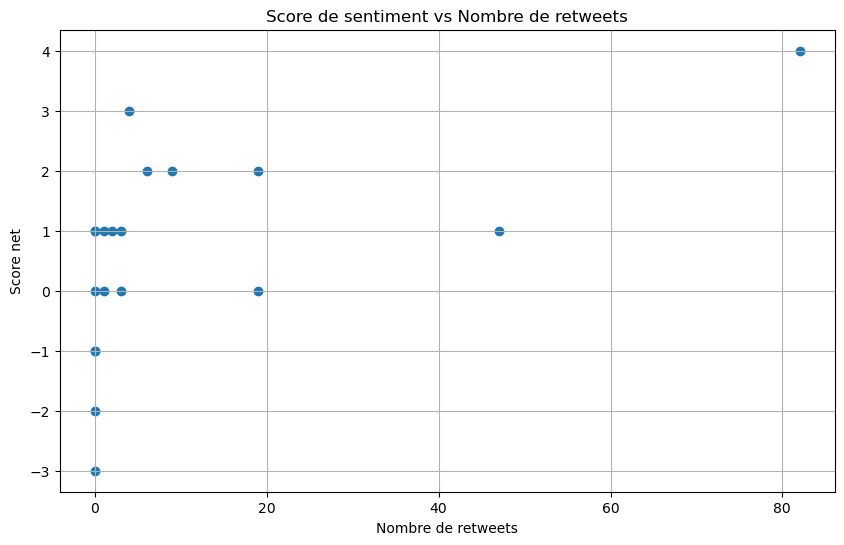

In [63]:
# 6. Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(result_df['retweet_count'], result_df['net_score'])
plt.xlabel('Nombre de retweets')
plt.ylabel('Score net')
plt.title('Score de sentiment vs Nombre de retweets')
plt.grid(True)
plt.show()